# Code Tutorial for Influence Maximization: Divide and Conquer

Please cite:

Influence Maximization: Divide and Conquer

Siddharth Patwardhan, Filippo Radicchi, Santo Fortunato

https://arxiv.org/abs/2210.01203

In [2]:
#import all neccesary functions
from main import *

The various methods described in the paper are applied on a planted partition graph available in NetworkX. We show the three methodologies used for the division of the network into sectors using graph partitioning, communtiy detection, and graph embedding with the METIS, Louvain, and Mercator algorithms, respectively.

In [3]:
#get networkx object for visualization and general usage and igraph object for the methods
g=nx.planted_partition_graph(5,25,0.2,0.005)
nx.write_edgelist(g,data=False,path='test_network.txt')
gI=read('test_network.txt',directed=False)

## Visualization of the network

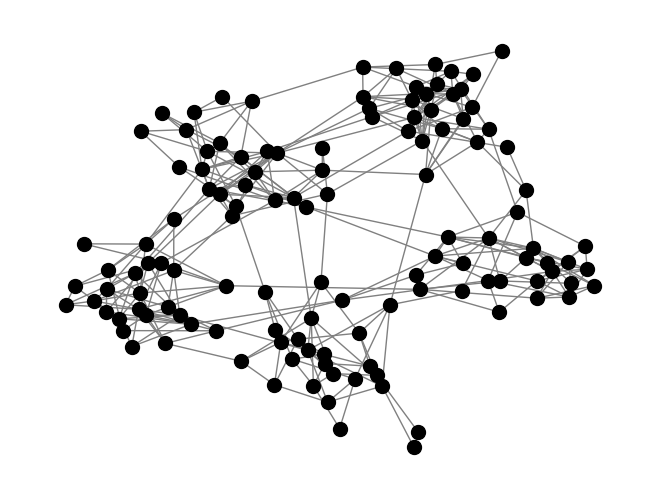

In [12]:
nx.draw(g,node_size=100,node_color='k',edge_color='gray',width=1)

# Dividing the Network

## Graph Partitioning

Here, we use METIS to divide the graph into 5 roughly equal sectors and visualize the discovered sectors using different colors.

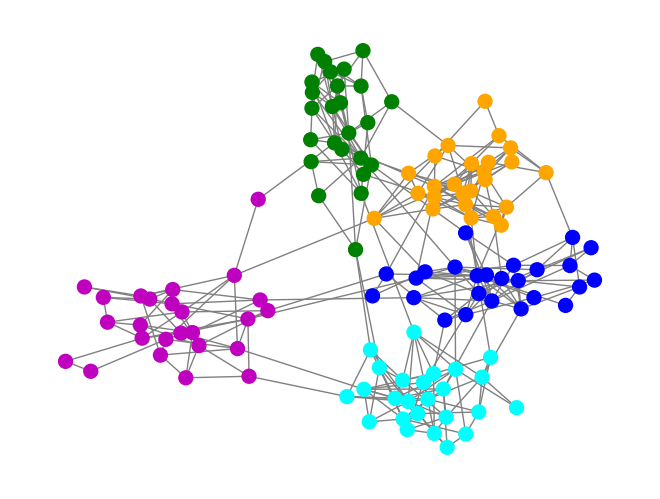

In [5]:
#use metis.part_graph to divide networkx graph object g into k partitions
k=5
_,temp=metis.part_graph(g,k)
#convert to a neat dictionary format
M={h:temp[h]+1 for h in range(g.number_of_nodes())}
#visualize

color_code={5:'b',1:'orange',2:'green',3:'m',4:'cyan'}
colors=[color_code[i] for i in M.values()]
nx.draw(g,node_size=100,node_color=colors,edge_color='gray',width=1,with_labels=False)

## Community Structure

Similarly, we now divide and visualize the network using the Louvain communtiy detection algorithm. 

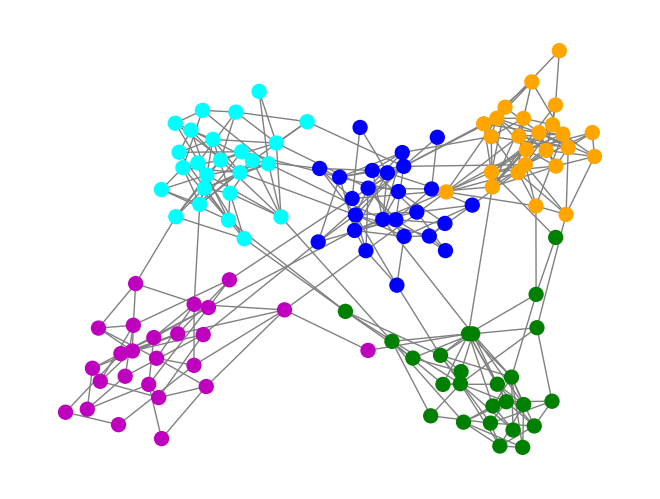

In [6]:
#use community_louvain.best_partition to get communities
C=community_louvain.best_partition(g)
#visualize

color_code={5:'b',1:'orange',2:'green',3:'m',4:'cyan'}
colors=[color_code[i] for i in M.values()]
nx.draw(g,node_size=100,node_color=colors,edge_color='gray',width=1,with_labels=False)

## Graph Embedding: Mercator

For graph embedding approaches we first embed the network in a geometric space. Here, we use Mercator to generate hyperbolic node embeddings for the network and divide the hyperbolic space into the desired number of sectors.

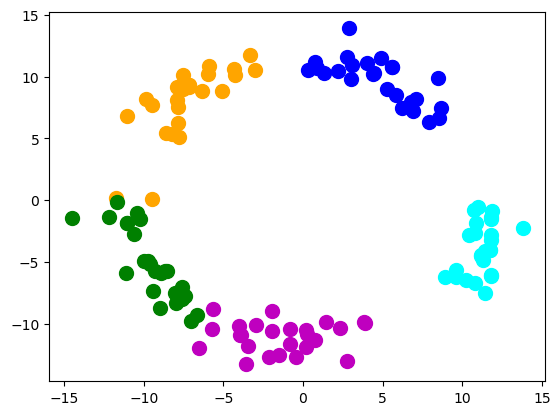

In [15]:
#use Mercator_Local to get hyperbolic embeddings
X=Mercator_Local('test_network')
X=X[X[:, 1].argsort()]
n=g.number_of_nodes()
k=5
for j in range(5):
    plt.plot([i[2]*np.cos(i[1]) for i in X[int(j*(n/k)):int((j+1)*(n/k))]],[i[2]*np.sin(i[1]) for i in X[int(j*(n/k)):int((j+1)*(n/k))]],'.',c=list(color_code.values())[j],markersize=20)

# Selecting Influential Spreaders

Once the graph has been divided into sectors using either of the three methodologies, we can use the obtained partition, community structure or embeddings with the adaptive degree heuristic to find influential spreaders using the functions below.

### Selecting Influential Spreaders: Graph Partitioning

In [18]:
#find spreaders using obtained graph partition M
S=Find_Influential_Spreaders_graph_partition(gI,M,k)
print('Found influencer set: ',S)

Found influencer set:  [45, 81, 57, 106, 16]


### Selecting Influential Spreaders: Community Structure

In [16]:
#find spreaders using obtained community structure C
S=Find_Influential_Spreaders_community(C,gI,k)
print('Found influencer set: ',S)

Found influencer set:  [81, 57, 31, 64, 95]


### Selecting Influential Spreaders: Mercator

In [17]:
#find spreaders using obtained graph embedding
S=Find_Influential_Spreaders_mercator(X,gI,k)
print('Found influencer set: ',S)

Found influencer set:  [81, 57, 31, 64, 95]
